In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from graph_tools import Graph
from laplacian_tools import Laplacian_Handler

# Original Graph

In [2]:
waypoints = np.array([
    [0, 0],
    [10, 0],
    [10, 10],
    [0, 0],
    [0, -10],
    [10, -10],
    [10, 0],
    [0, 0],
    [0, 10]
])

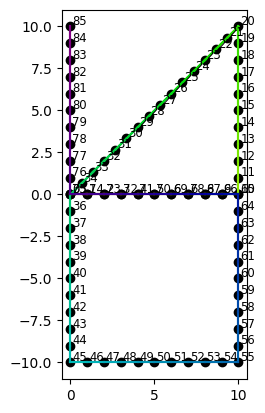

Laplacian: 1645581833.9999921
0: 18983264820.999863
1: 19477603196.999866
2: 20150551286.999863
3: 20842766423.99986
4: 21508876872.999855
5: 22136528960.999855
6: 22722380970.99985
7: 23265472967.999847
8: 23765450228.999844
9: 24224175836.999844
10: 24683199606.999847
11: 25782075215.999847
12: 26770844394.999847
13: 27649507143.99985
14: 28418063462.999847
15: 29076513351.999855
16: 29624856810.99985
17: 30063093839.999855
18: 30391224438.99985
19: 30609248607.99985
20: 30717166346.999847
21: 30714977655.999855
22: 30602682534.99985
23: 30380280983.999855
24: 30047773002.999855
25: 29605158591.999863
26: 29052437750.99986
27: 28389610479.99985
28: 27616676778.999855
29: 26733636647.999855
30: 25740490086.99985
31: 24637237095.99985
32: 23423877674.99985
33: 22100411823.999855
34: 20666839542.99986
35: 19123160831.999863
36: 20682267875.99986
37: 22146696899.99985
38: 23516447903.999844
39: 24791520887.99984
40: 25971915851.99983
41: 27057632795.999817
42: 28048671719.999813
43: 2894

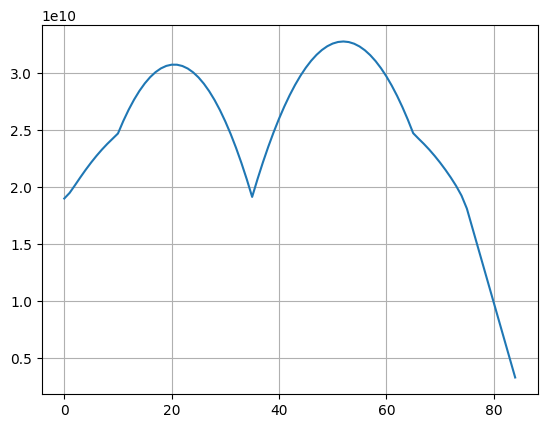

In [3]:
g = Graph(waypoints=waypoints)
g.plot()
l = Laplacian_Handler(g)
print(f"Laplacian: {l.lap_det}")

# print(l.add_edge(73, 20))
lap_dets = []
for i in range(85):
    new_lap_det = l.simulate_add_edge(85, i)
    lap_dets.append(new_lap_det)
    print(f"{i}: {new_lap_det}")
    
print(f"Laplacian:\n")
np.set_printoptions(threshold=100000)
for i, row in enumerate(l.lap):
# for i, row in enumerate(g.adjacency_matrix()):
    print(f"{i}: {row}")
    
for i in g.graph_edges:
    print(f"{i}: {g.graph_edges[i]}")
    
for i, row in enumerate(g.laplacian()):
    assert np.sum(row) == 0, f"sum is not 1: {i}: {row}"
    
plt.plot(np.arange(85), lap_dets)
plt.grid(True)

In [4]:
def simulate_add_edge(L_reduced, node1: int, node2: int) -> float:
    # column of reduced incidence matrix
    a_uv = np.zeros(len(L_reduced)) 
    # if either of the nodes are 0, a_uv contains only one 1
    if node1 - 1 >= 0:
        a_uv[node1 - 1] = -1
    if node2 - 1 >= 0:
        a_uv[node2 - 1] = 1
    print(a_uv[80:])
    return L_reduced + np.outer(a_uv, a_uv)


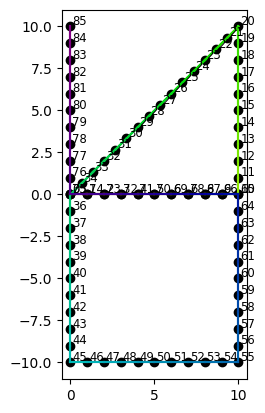

21.221359857107423
22.319972145775534
[ 0.  0.  1.  0. -1.]
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  3. -1. -1.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0. -1. -1.  2.]]
22.31997214577553
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  3. -1. -1.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0. -1. -1.  2.]]
[ 0.  0.  1.  0. -1.]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -1.]]


In [5]:
g = Graph(waypoints=waypoints)
g.plot()
lap = g.reduced_laplacian()
print(np.log(la.det(lap)))
l = Laplacian_Handler(g)
print(np.log(l.simulate_add_edge(85, 83)))
print(simulate_add_edge(g.reduced_laplacian(), 85, 83)[80:,80:])

g.add_edge(85, 83)
print(np.log(la.det(g.reduced_laplacian())))


print(g.reduced_laplacian()[80:,80:])
print((g.reduced_laplacian() - simulate_add_edge(g.reduced_laplacian(), 85, 83))[80:,80:])

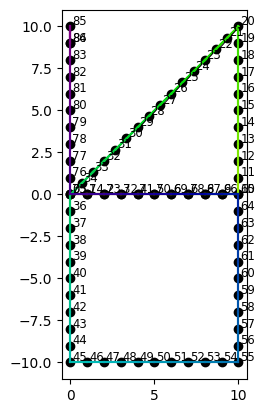

22.319972145775527


In [6]:
waypoints_new = np.concatenate((waypoints, [[0, 9]]), axis=0)
g = Graph(waypoints=waypoints_new)
g.plot()
lap = g.reduced_laplacian()
print(np.log(la.det(lap)))